<a href="https://colab.research.google.com/github/cleysonl/Tensorflow2.0/blob/master/Tensorflow_2_0_CC_CLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 48.7MB/s 
     |████████████████████████████████| 450kB 65.6MB/s 
     |████████████████████████████████| 81kB 12.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exis

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


## **1. Basics**

### **Tensors**

In [3]:
#constant tensor
x = tf.constant([[3,4],[2,1]])
print(x)

tf.Tensor(
[[3 4]
 [2 1]], shape=(2, 2), dtype=int32)


In [4]:
# Convert the value to numpy array
x.numpy()

array([[3, 4],
       [2, 1]], dtype=int32)

In [5]:
# As numpy array, it has the attribute dtype and shape:
print('dtype:', x.dtype)
print('shape:', x.shape)


dtype: <dtype: 'int32'>
shape: (2, 2)


In [6]:
# Arrays of ones an zeros
print(tf.ones(shape=(2,1)))
print(tf.zeros(shape=(2,1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


### **Random constant tensors**

In [7]:
tf.random.normal(shape=(2,2),mean =0., stddev = 1.)

<tf.Tensor: id=12, shape=(2, 2), dtype=float32, numpy=
array([[ 1.460768  , -1.3217205 ],
       [-0.61596614, -1.3872572 ]], dtype=float32)>

In [8]:
tf.random.uniform(shape=(2,2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: id=16, shape=(2, 2), dtype=int32, numpy=
array([[3, 7],
       [5, 5]], dtype=int32)>

### **Variables**

In [9]:
initial_value = tf.random.normal(shape=(2,2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.14426076,  1.2626287 ],
       [-2.1606781 ,  0.6289231 ]], dtype=float32)>


In [10]:
new_value = tf.random.normal(shape=(2,2))
a.assign(new_value)
print(a)
for i in range(2):
  for j in range(2):
    assert a[i,j]==new_value[i,j]
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.7125629 , -0.44679722],
       [ 1.768894  , -0.365348  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.7125629 , -0.44679722],
       [ 1.768894  , -0.365348  ]], dtype=float32)>


In [11]:
added_value = tf.random.normal(shape=(2,2))
a.assign_add(added_value)
print(a)
for i in range(2):
  for j in range(2):
    assert a[i,j]== new_value[i,j] + added_value[i,j]
print(a)    

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-3.1520166 , -0.48877853],
       [ 2.9824872 ,  0.11248887]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-3.1520166 , -0.48877853],
       [ 2.9824872 ,  0.11248887]], dtype=float32)>


### **Doing math in TF**

In [0]:
a = tf.random.normal(shape=(2,2))
b = tf.random.normal(shape=(2,2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

### **Computing gradient with** 'GradientTape'

In [13]:
a = tf.random.uniform(shape=(2,2))
b = tf. random.uniform(shape=(2,2))

a= tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.sqrt(b))
  dc_da = tape.gradient(c,a)
  print(dc_da)

tf.Tensor(
[[0.832336   0.49297416]
 [0.62790304 0.42914617]], shape=(2, 2), dtype=float32)


In [14]:
# High-order derivatives with nesting tapes
with tf.GradientTape() as outer_tape:
  with tf. GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c,a)
  dc2_da2= outer_tape.gradient(dc_da,a)
  print(dc2_da2)

tf.Tensor(
[[0.01122081 0.5623325 ]
 [0.42589855 0.844967  ]], shape=(2, 2), dtype=float32)


### **End to end example: linear regression**

In [0]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

#Weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features,w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x,y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w,b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

Generate artificial data for our model

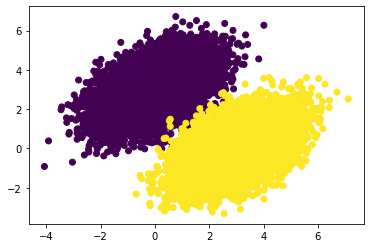

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#Prepare the dataset
num_samples =10000
negative_samples = np.random.multivariate_normal(mean =[0,3], cov=[[1,0.5],[0.5,1]], size = num_samples)
positive_samples = np.random.multivariate_normal(mean =[3,0], cov=[[1,0.5],[0.5,1]], size = num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples,1), dtype ='float32'),
                   np.ones((num_samples,1), dtype = 'float32')))

plt.scatter(features[:,0], features[:,1], c=labels[:,0])

In [17]:
# Shuffle the data
indices = np.random.permutation(len(features))
features = features[indices] 
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features,labels))
# From a buffer_size of 1024 (size of the universe we are using) get batches of 256
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x,y) in enumerate(dataset):
    # print(x.shape)
    # print(y.shape)
    loss = train_on_batch(x,y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))


Epoch 0: last batch loss = 0.0628
Epoch 1: last batch loss = 0.0576
Epoch 2: last batch loss = 0.0411
Epoch 3: last batch loss = 0.0227
Epoch 4: last batch loss = 0.0248
Epoch 5: last batch loss = 0.0298
Epoch 6: last batch loss = 0.0219
Epoch 7: last batch loss = 0.0208
Epoch 8: last batch loss = 0.0211
Epoch 9: last batch loss = 0.0190


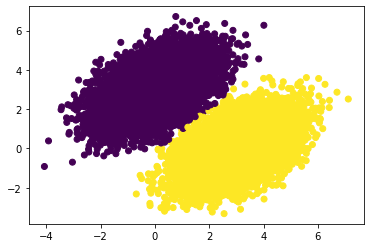

In [18]:
predictions = compute_predictions(features)
plt.scatter(features[:,0], features[:,1], c=predictions[: , 0]> 0.5)

## **Making it fast with tf.function**

In [19]:
import time
 
t0 = time.time()
for epoch in range(20):
  for step, (x,y) in enumerate(dataset):
    loss = train_on_batch(x,y)
t_end = time.time()- t0
print('Time per epoch: %.3f s' %(t_end / 20,))
print(x.shape)
print(y.shape)

Time per epoch: 0.227 s
(32, 2)
(32, 1)


In [0]:
@tf.function
def train_on_batch(x,y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(labels, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w,b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss 

In [22]:
import time
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

ValueError: ignored

## **Keras API**

### **The base layer**

In [0]:
from tensorflow.keras.layers import Layer

class Linear(Layer):

  def __init__(self, units=32, input_dim=32):
    super(Linear,self).__init__()
    w_init= tf.random_normal_initializer()
    self.w= tf.Variable(initial_value = w_init(shape=(input_dim,units), dtype='float32'),trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(initial_value=b_init(shape=(units,),dtype='float32'), trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

linear_layer = Layer(4,2)

    

In [0]:
y = linear_layer(tf.ones((2,2)))
assert y.shape ==(2,4)